In [15]:
import matplotlib.pyplot as plt
import pandas
import scipy.stats
import numpy as np

In [16]:
help(plt.show)

Help on function show in module matplotlib.pyplot:

show(close=None, block=None)
    Display all open figures.
    
    In non-interactive mode, *block* defaults to True.  All figures
    will display and show will not return until all windows are closed.
    If there are no figures, return immediately.
    
    In interactive mode *block* defaults to False.  This will ensure
    that all of the figures are shown and this function immediately returns.
    
    Parameters
    ----------
    block : bool, optional
    
        If `True` block and run the GUI main loop until all windows
        are closed.
    
        If `False` ensure that all windows are displayed and return
        immediately.  In this case, you are responsible for ensuring
        that the event loop is running to have responsive figures.
    
    See Also
    --------
    ion : enable interactive mode
    ioff : disable interactive mode



In [17]:
# lecture du csv et affichage
prenoms = pandas.read_csv("Prénoms/nat2019.csv", header = 0, sep = ";")
prenoms

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1340
2,1,_PRENOMS_RARES,1902,1329
3,1,_PRENOMS_RARES,1903,1285
4,1,_PRENOMS_RARES,1904,1427
...,...,...,...,...
652051,2,ZYNEB,2016,6
652052,2,ZYNEB,2017,6
652053,2,ZYNEB,2018,5
652054,2,ZYNEB,2019,7


In [18]:
# Note : 1 = homme, 2 = femme. test

In [19]:
def search(name, year):
    result = [0,0]
    for i in range(652056):
        if prenoms['preusuel'][i] == name:
            if prenoms['annais'][i] == year:
                result[prenoms['sexe'][i] - 1] = prenoms['nombre'][i]
    return result

research = 'KEVIN', '1986'

result = search(research[0], research[1])

print("Il y a eu " + str(result[0]) + " garçon(s) nommé(s) " + research[0] + " en " + research[1] + ".")
print("Il y a eu " + str(result[1]) + " fille(s) nommée(s) " + research[0] + " en " + research[1] + ".")


Il y a eu 4875 garçon(s) nommé(s) KEVIN en 1986.
Il y a eu 3 fille(s) nommée(s) KEVIN en 1986.


Le prénom EMANUEL a été donné 46 fois à des hommes pour des années indéfinies


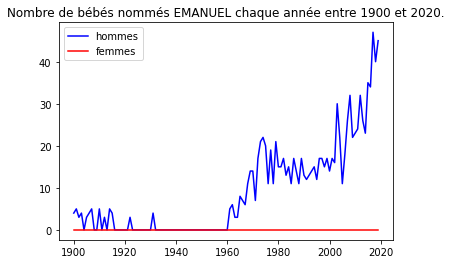

In [20]:
def plotNumberByYear(dataBase, name):
    isName = dataBase['preusuel']==name
    allName = dataBase[isName]

    allName = allName.replace('XXXX', '2050')



    allName['annais'] = allName['annais'].astype(int)

    X_M = [x for x in allName[allName.sexe==1].annais.array]
    Y_M = [y for y in allName[allName.sexe==1].nombre.array]
    X_F = [x for x in allName[allName.sexe==2].annais.array]
    Y_F = [y for y in allName[allName.sexe==2].nombre.array]

    for i in range(1900,2020):
        if not i in X_M:
            Y_M.insert(i-1900, 0)
        if not i in X_F:
            Y_F.insert(i-1900, 0)
    X = [i for i in range(1900, 2020)]
    if not 2050 in X_M :
        Y_M.append(0)
    if not 2050 in X_F :
        Y_F.append(0)


    males, = plt.plot(X, Y_M[:-1], c = 'blue')
    females, = plt.plot(X, Y_F[:-1], c = 'red')
    plt.legend([males, females], ['hommes', 'femmes'])
    plt.title("Nombre de bébés nommés " + name + " chaque année entre 1900 et 2020.")
    if Y_M[-1] != 0 :
        print("Le prénom " + name + " a été donné " + str(Y_M[-1]) + " fois à des hommes pour des années indéfinies")
    if Y_F[-1] != 0 :
        print("Le prénom " + name + " a été donné " + str(Y_F[-1]) + " fois à des femmes pour des années indéfinies")

plotNumberByYear(prenoms, "EMANUEL")

Traintement de la base de donnée des prénoms intéressants:


Le prénom ZIDANE a été donné 31 fois à des hommes pour des années indéfinies


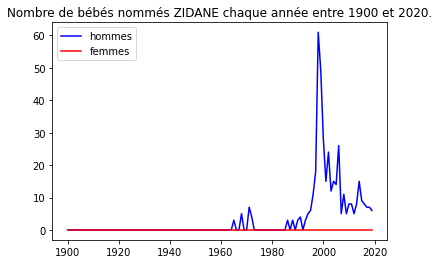



Le prénom MICHAEL a été donné 14 fois à des hommes pour des années indéfinies
Le prénom MICHAEL a été donné 27 fois à des femmes pour des années indéfinies


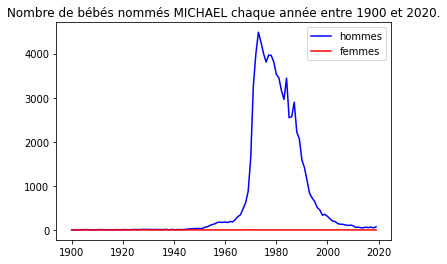



Le prénom AURELIEN a été donné 17 fois à des hommes pour des années indéfinies


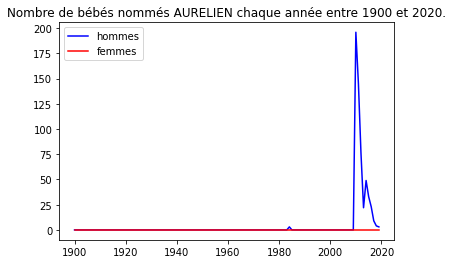



Le prénom DAVID a été donné 64 fois à des femmes pour des années indéfinies


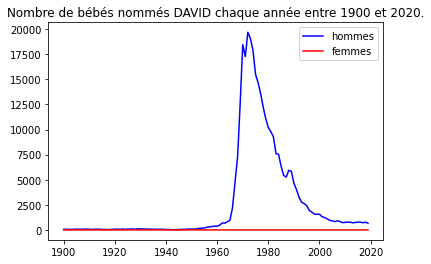






Traintement de la base de donnée des prénoms de zoomers:


Le prénom MATTHIEU a été donné 30 fois à des hommes pour des années indéfinies


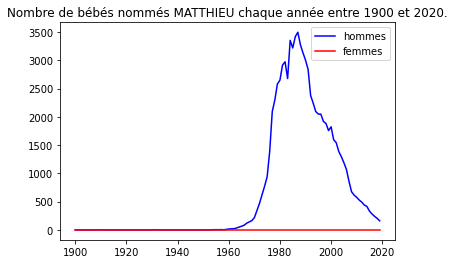



Le prénom MANON a été donné 20 fois à des hommes pour des années indéfinies
Le prénom MANON a été donné 19 fois à des femmes pour des années indéfinies


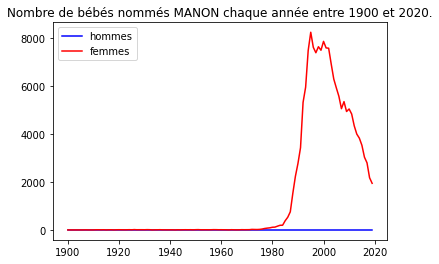



Le prénom ENZO a été donné 20 fois à des hommes pour des années indéfinies
Le prénom ENZO a été donné 27 fois à des femmes pour des années indéfinies


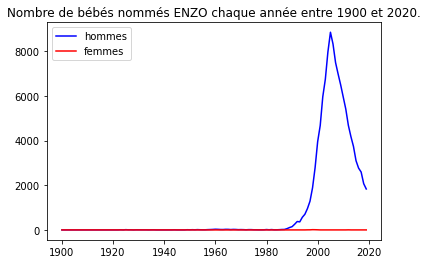



Le prénom QUENTIN a été donné 44 fois à des hommes pour des années indéfinies
Le prénom QUENTIN a été donné 21 fois à des femmes pour des années indéfinies


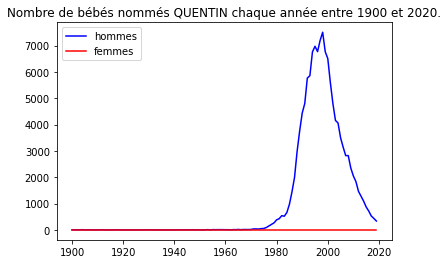






Traintement de la base de donnée des prénoms de boomers:


Le prénom JEAN a été donné 34 fois à des femmes pour des années indéfinies


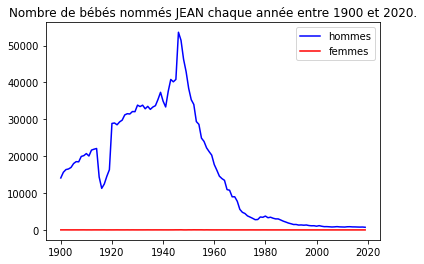



Le prénom JACQUES a été donné 43 fois à des femmes pour des années indéfinies


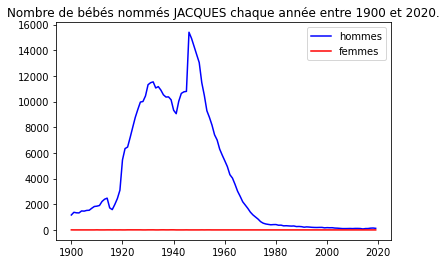






Traintement de la base de donnée des prénoms à nouveau à la mode:


Le prénom LOUIS a été donné 61 fois à des femmes pour des années indéfinies


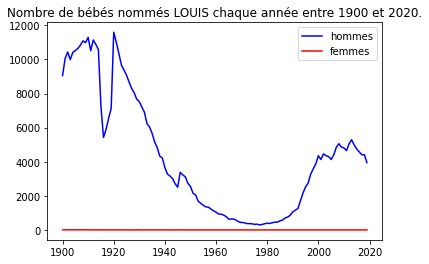






Traintement de la base de donnée des prénoms des gens uniques:




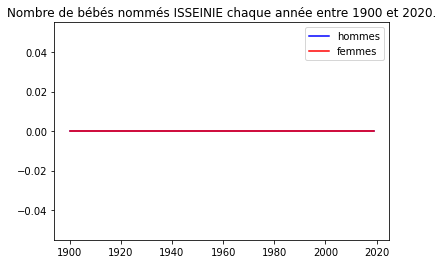






Traintement de la base de donnée des prénoms des méchants:


Le prénom ADOLF a été donné 23 fois à des hommes pour des années indéfinies


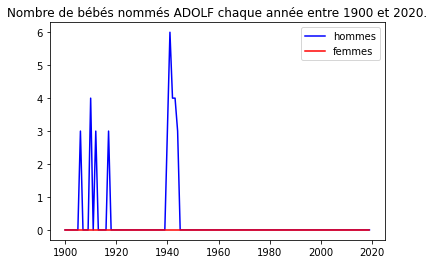



Le prénom JOSEPH a été donné 36 fois à des femmes pour des années indéfinies


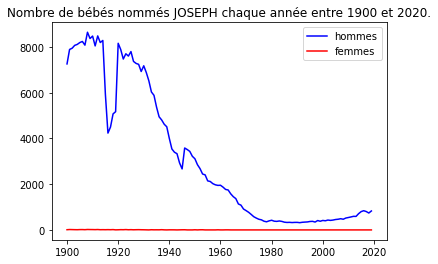

In [21]:
# Prénoms intéressants : Zidane
# Prénoms de Zoomers : Matthieu, Manon, Enzo, Quentin
# Prénoms de Boomers : Jean
# Prénoms de nouveau à la mode : Louis
# Crying names : Isseïnie
interesting = ["ZIDANE", "MICHAEL", "AURELIEN", "DAVID"]
zoomers = ["MATTHIEU", "MANON", "ENZO", "QUENTIN"]
boomers = ["JEAN", "JACQUES"]
fashionAgain = ["LOUIS"]
lonely = ["ISSEINIE"]
dictateurs = ["ADOLF", "JOSEPH"]
databases = [interesting, zoomers, boomers, fashionAgain, lonely, dictateurs]
databasesNames = ["intéressants", "de zoomers", "de boomers", "à nouveau à la mode", "des gens uniques", "des méchants"]
for i in range(len(databases)) :
    print("Traintement de la base de donnée des prénoms " + databasesNames[i] + ":\n\n")
    for prenom in databases[i] :
        plotNumberByYear(prenoms, prenom)
        plt.show()
        print("\n")
    print("\n\n")